<a href="https://colab.research.google.com/github/nkosimate/LSTM-autoencoder/blob/main/LSTM_AE_with_labelled_data_seconds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation and Visualisation



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import io
import pandas as pd
from google.colab import files

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/20230930_040000_QDQD_483014_0.csv')
df

<ipython-input-3-159681e8e53c>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/gdrive/MyDrive/20230930_040000_QDQD_483014_0.csv')


,TIME,WOB (SURFACE),BIT DEPTH (SURFACE),DEPTH (SURFACE),ROP (SURFACE),BLOCK POSITION (SURFACE),RPM (SURFACE),HOOKLOAD (SURFACE),TORQUE (SURFACE),SPP (SURFACE),FLOW OUT (SURFACE),FLOW IN (SURFACE),TTV2 (SURFACE),TTV (SURFACE),TVA (SURFACE),TVT (SURFACE),MLOG LAG DEPTH,SPM3 (SURFACE),SPM2 (SURFACE),SPM1 (SURFACE)
0,"yyyy-MM-dd""T""HH:mm:ss.fffzzz",klbf,ft,ft,ft/h,ft,RPM,klbf,kft.lbf,psi,%,USgal/min,bbl,bbl,bbl,bbl,in,SPM,SPM,SPM
1,2023-09-30T07:00:00.000+03:00,10.500,8736.230,8736.230,0.000,59.200,40.001,249.700,2.913,1439.600,17.000,450.000,0.900,33.100,365.700,365.700,-999.25,62.000,0.000,63.000
2,2023-09-30T07:00:00.387+03:00,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,104604.744,-999.25,-999.25,-999.25
3,2023-09-30T07:00:01.000+03:00,10.500,8736.230,8736.230,0.000,59.200,40.001,249.700,3.447,1451.200,18.000,449.000,0.900,33.100,366.000,366.000,-999.25,62.000,0.000,62.000
4,2023-09-30T07:00:02.000+03:00,10.500,8736.230,8736.230,0.000,59.200,40.001,249.700,3.010,1442.500,18.000,450.000,0.900,33.200,365.500,365.500,-999.25,62.000,0.000,63.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229642,2023-10-12T05:45:26.000+03:00,0.0,9773.62,9773.62,23.0,45.9,39.001,204.6,1.481,2068.8,15.0,221.0,38.7,2.0,159.6,159.6,-999.25,61.0,0.0,0.0
1229643,2023-10-12T05:45:27.000+03:00,0.0,9773.62,9773.62,23.0,45.9,38.001,204.6,2.427,2068.8,15.0,221.0,38.3,2.0,159.6,159.6,-999.25,61.0,0.0,0.0
1229644,2023-10-12T05:45:28.000+03:00,0.0,9773.64,9773.64,23.0,45.8,38.001,205.3,2.354,2087.4,16.0,221.0,39.0,2.1,159.5,159.5,-999.25,61.0,0.0,0.0
1229645,2023-10-12T05:45:29.000+03:00,0.0,9773.64,9773.64,23.0,45.8,39.001,205.3,1.65,2076.8,15.0,221.0,38.5,1.9,159.6,159.6,-999.25,61.0,0.0,0.0


In [ ]:
df = df.drop([0])

In [ ]:
# View data types
print("df types: \n",df.dtypes)

df1 types: 
 TIME                               object
 WOB (SURFACE)               object
 BIT DEPTH (SURFACE)         object
 DEPTH (SURFACE)             object
 ROP (SURFACE)               object
 BLOCK POSITION (SURFACE)    object
 RPM (SURFACE)               object
 HOOKLOAD (SURFACE)          object
 TORQUE (SURFACE)            object
 SPP (SURFACE)               object
 FLOW OUT (SURFACE)          object
 FLOW IN (SURFACE)           object
 TTV2 (SURFACE)              object
 TTV (SURFACE)               object
 TVA (SURFACE)               object
 TVT (SURFACE)               object
 MLOG LAG DEPTH              object
 SPM3 (SURFACE)              object
 SPM2 (SURFACE)              object
 SPM1 (SURFACE)              object
dtype: object
df2 types: 
 TIME                               object
 WOB (SURFACE)               object
 BIT DEPTH (SURFACE)         object
 DEPTH (SURFACE)             object
 ROP (SURFACE)               object
 BLOCK POSITION (SURFACE)    object
 RPM (SURFAC

In [ ]:
# Check the type of 'time' column
print(df['TIME'].dtype)
# Convert TIME column to datetime64[ns, UTC+03:00]
df['TIME'] = pd.to_datetime(df['TIME']).dt.tz_convert('UTC+03:00')
# Verify the conversion
print(df['TIME'].dtype)

object
datetime64[ns, UTC+03:00]
object
datetime64[ns, UTC+03:00]
object
datetime64[ns, UTC+03:00]


In [ ]:
#Replace spaces or empty strings with NaN
import numpy as np
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
# List of columns to convert from object to float
columns_to_convert = [
    " WOB (SURFACE)",
    " BIT DEPTH (SURFACE)",
    " DEPTH (SURFACE)",
    " ROP (SURFACE)",
    " BLOCK POSITION (SURFACE)",
    " RPM (SURFACE)",
    " HOOKLOAD (SURFACE)",
    " TORQUE (SURFACE)",
    " SPP (SURFACE)",
    " FLOW OUT (SURFACE)",
    " FLOW IN (SURFACE)",
    " TTV2 (SURFACE)",
    " TTV (SURFACE)",
    " TVA (SURFACE)",
    " TVT (SURFACE)",
    " MLOG LAG DEPTH",
    " SPM3 (SURFACE)",
    " SPM2 (SURFACE)",
    " SPM1 (SURFACE)"
]

# Convert each column to float
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Verify the conversion
print("df types: \n",df.dtypes)

df types: 
 TIME                               datetime64[ns, UTC+03:00]
 WOB (SURFACE)                                  object
 BIT DEPTH (SURFACE)                            object
 DEPTH (SURFACE)                                object
 ROP (SURFACE)                                  object
 BLOCK POSITION (SURFACE)                       object
 RPM (SURFACE)                                  object
 HOOKLOAD (SURFACE)                             object
 TORQUE (SURFACE)                               object
 SPP (SURFACE)                                  object
 FLOW OUT (SURFACE)                             object
 FLOW IN (SURFACE)                              object
 TTV2 (SURFACE)                                 object
 TTV (SURFACE)                                  object
 TVA (SURFACE)                                  object
 TVT (SURFACE)                                  object
 MLOG LAG DEPTH                                 object
 SPM3 (SURFACE)                                

In [ ]:
#Create new dataframe object without "Heartbeat" data
df_final = df[df[' DEPTH (SURFACE)']>=0]
df_final

,TIME,WOB (SURFACE),BIT DEPTH (SURFACE),DEPTH (SURFACE),ROP (SURFACE),BLOCK POSITION (SURFACE),RPM (SURFACE),HOOKLOAD (SURFACE),TORQUE (SURFACE),SPP (SURFACE),FLOW OUT (SURFACE),FLOW IN (SURFACE),TTV2 (SURFACE),TTV (SURFACE),TVA (SURFACE),TVT (SURFACE),MLOG LAG DEPTH,SPM3 (SURFACE),SPM2 (SURFACE),SPM1 (SURFACE)
1,2023-09-30 07:00:00+03:00,10.5,8736.23,8736.23,0.0,59.2,40.001,249.7,2.913,1439.6,17.0,450.0,0.9,33.1,365.7,365.7,-999.25,62.0,0.0,63.0
3,2023-09-30 07:00:01+03:00,10.5,8736.23,8736.23,0.0,59.2,40.001,249.7,3.447,1451.2,18.0,449.0,0.9,33.1,366.0,366.0,-999.25,62.0,0.0,62.0
4,2023-09-30 07:00:02+03:00,10.5,8736.23,8736.23,0.0,59.2,40.001,249.7,3.010,1442.5,18.0,450.0,0.9,33.2,365.5,365.5,-999.25,62.0,0.0,63.0
5,2023-09-30 07:00:03+03:00,10.0,8736.23,8736.23,0.0,59.2,40.001,250.3,2.791,1439.6,18.0,450.0,0.9,33.2,365.8,365.8,-999.25,62.0,0.0,63.0
6,2023-09-30 07:00:04+03:00,10.3,8736.23,8736.23,0.0,59.2,40.001,249.7,2.864,1442.5,18.0,450.0,0.9,33.1,366.0,366.0,-999.25,62.0,0.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035068,2023-04-27 07:29:57.060000+03:00,21.7,9667.63,9667.63,0.3,64.1,25.000,221.5,2.209,367.8,14.0,120.0,38.9,18.1,187.5,187.5,-999.25,33.0,0.0,0.0
1035069,2023-04-27 07:29:57.205000+03:00,21.7,9667.63,9667.63,0.3,64.1,25.000,222.2,2.184,362.5,13.0,120.0,38.6,18.0,187.5,187.5,-999.25,33.0,0.0,0.0
1035070,2023-04-27 07:29:58.067000+03:00,21.8,9667.63,9667.63,0.3,64.1,25.000,221.5,2.209,362.5,14.0,120.0,38.8,17.9,186.2,186.2,-999.25,33.0,0.0,0.0
1035071,2023-04-27 07:29:58.205000+03:00,21.7,9667.63,9667.63,0.3,64.1,25.000,221.5,2.306,365.2,14.0,120.0,38.8,17.9,187.5,187.5,-999.25,33.0,0.0,0.0


In [ ]:
df_final.fillna(method='bfill', inplace=True)

<ipython-input-13-267913e1e090>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_final.fillna(method='bfill', inplace=True)
<ipython-input-13-267913e1e090>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.fillna(method='bfill', inplace=True)


In [ ]:
col_to_drop = [' TTV (SURFACE)',' TVT (SURFACE)',' MLOG LAG DEPTH',
               ' SPM3 (SURFACE)', ' SPM2 (SURFACE)',' SPM1 (SURFACE)',' TTV2 (SURFACE)']
df_final = df_final.drop(columns=col_to_drop)
df_final

## On Bottom Drilling

We only need to check for the data when there is on bottom drilling thus, we need the bit depth and the depth to be the same and the ROP to be greater than zero.


In [ ]:
#only get data when it is on bottom drilling and that is when bit depth == depth
drilling_df = df_final[df_final[' BIT DEPTH (SURFACE)'] == df_final[' DEPTH (SURFACE)']]
drilling_df = drilling_df[drilling_df[' ROP (SURFACE)'] > 0]
drilling_df = drilling_df.reset_index(drop = True)
drilling_df

,TIME,WOB (SURFACE),BIT DEPTH (SURFACE),DEPTH (SURFACE),ROP (SURFACE),BLOCK POSITION (SURFACE),RPM (SURFACE),HOOKLOAD (SURFACE),TORQUE (SURFACE),SPP (SURFACE),FLOW OUT (SURFACE),FLOW IN (SURFACE),TVA (SURFACE)
0,2023-03-24 03:46:00+03:00,10.157143,8736.235714,8736.235714,0.238095,59.171429,40.001000,250.204762,2.990143,1440.980952,17.095238,449.666667,366.123810
1,2023-03-24 03:47:00+03:00,9.543333,8736.339167,8736.339167,9.390000,59.043333,40.001000,250.836667,3.163517,1438.778333,16.316667,449.666667,365.800000
2,2023-03-24 03:48:00+03:00,13.910000,8736.571500,8736.571500,14.125000,58.818333,39.767667,246.400000,4.165967,1426.840000,16.366667,449.683333,365.740000
3,2023-03-24 03:49:00+03:00,15.326667,8736.649500,8736.649500,4.208333,58.750000,39.834333,245.045000,3.945833,1421.620000,16.116667,449.733333,366.661667
4,2023-03-24 03:50:00+03:00,17.095000,8736.829000,8736.829000,9.958333,58.523333,39.667667,243.281667,4.325683,1414.788333,16.850000,449.683333,367.058333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8630,2023-10-12 05:41:00+03:00,1.776667,9772.161333,9772.161333,29.615000,47.305000,38.317667,202.886667,2.256900,2089.008333,15.783333,220.966667,158.235000
8631,2023-10-12 05:42:00+03:00,0.581667,9772.480833,9772.480833,16.603333,46.986667,38.451000,204.165000,2.093467,2088.306667,15.933333,221.066667,158.196667
8632,2023-10-12 05:43:00+03:00,0.000000,9772.851500,9772.851500,22.546667,46.625000,38.367667,205.506667,1.953100,2098.301667,15.683333,220.950000,158.165000
8633,2023-10-12 05:44:00+03:00,0.000000,9773.244667,9773.244667,23.805000,46.231667,38.401000,205.900000,1.983400,2083.573333,15.766667,221.000000,158.100000


In [ ]:
drilling_df['flow_rate_change_in5'] = drilling_df[' FLOW OUT (SURFACE)'].rolling(window=60).apply(lambda x:(x.iloc[-1] - x.iloc[0]))
drilling_df['TVA_change_in5'] = drilling_df[' TVA (SURFACE)'].rolling(window=60).apply(lambda x:(x.iloc[-1] - x.iloc[0]))
drilling_df['ROP_change_in5'] = drilling_df[' ROP (SURFACE)'].rolling(window=60).apply(lambda x:(x.iloc[-1] - x.iloc[0]))
drilling_df['SPP_change_in5'] = drilling_df[' SPP (SURFACE)'].rolling(window=60).apply(lambda x:(x.iloc[-1] - x.iloc[0]))
drilling_df['WOB_change_in5'] = drilling_df[' WOB (SURFACE)'].rolling(window=60).apply(lambda x:(x.iloc[-1] - x.iloc[0]))
drilling_df['Flow_in_change_in5'] = drilling_df[' FLOW IN (SURFACE)'].rolling(window=60).apply(lambda x:(x.iloc[-1] - x.iloc[0]))

# Initialize the score
drilling_df['score'] = 0

# Calculate the score based on the given conditions
drilling_df['score'] += 90 * ((drilling_df['flow_rate_change_in5'] >= 15) & (drilling_df['TVA_change_in5'] >= 5))
drilling_df['score'] += 40 * ((drilling_df['flow_rate_change_in5'] >= 15) | (drilling_df['TVA_change_in5'] >= 5))
drilling_df['score'] += 20 * (drilling_df['ROP_change_in5'] >= 50)
drilling_df['score'] += 20 * ((drilling_df['SPP_change_in5'] >= 10) | (drilling_df['SPP_change_in5'] <= -10))
drilling_df['score'] += 20 * ((drilling_df['WOB_change_in5'] >= 20) | (drilling_df['WOB_change_in5'] <= -20))
drilling_df['score'] += 20 * (drilling_df['Flow_in_change_in5'] >= 10)

# Assign possible kick based on the score
drilling_df['possible_kick'] = 0
drilling_df.loc[drilling_df['score'] >= 70, 'possible_kick'] = 2
drilling_df.loc[(drilling_df['score'] >= 40) & (drilling_df['score'] < 70), 'possible_kick'] = 1

# Display the first few rows with the calculated fields
drilling_df[['TIME', 'flow_rate_change_in5', 'TVA_change_in5', 'ROP_change_in5', 'SPP_change_in5', 'WOB_change_in5',
               'Flow_in_change_in5', 'score', 'possible_kick']].head(8)


,TIME,flow_rate_change_in5,TVA_change_in5,ROP_change_in5,SPP_change_in5,WOB_change_in5,Flow_in_change_in5,score,possible_kick
0,2023-03-24 03:46:00+03:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,2023-03-24 03:47:00+03:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,2023-03-24 03:48:00+03:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,2023-03-24 03:49:00+03:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,2023-03-24 03:50:00+03:00,-0.245238,0.934524,9.720238,-26.192619,6.937857,0.016667,20,0
5,2023-03-24 03:51:00+03:00,0.100000,1.400000,-5.295000,-30.613333,6.983333,0.000000,20,0
6,2023-03-24 03:52:00+03:00,0.166667,0.766667,-3.216667,-21.491667,1.948333,0.116667,20,0
7,2023-03-24 03:53:00+03:00,0.283333,3.066667,6.688333,-24.943333,0.611667,-0.033333,20,0


In [ ]:
drilling_df.fillna(0,inplace=True)
# Display the first few rows with the calculated fields
drilling_df[['TIME', 'flow_rate_change_in5', 'TVA_change_in5', 'ROP_change_in5', 'SPP_change_in5', 'WOB_change_in5',
               'Flow_in_change_in5', 'score', 'possible_kick']].head(8)

,TIME,flow_rate_change_in5,TVA_change_in5,ROP_change_in5,SPP_change_in5,WOB_change_in5,Flow_in_change_in5,score,possible_kick
0,2023-03-24 03:46:00+03:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,2023-03-24 03:47:00+03:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,2023-03-24 03:48:00+03:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,2023-03-24 03:49:00+03:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,2023-03-24 03:50:00+03:00,-0.245238,0.934524,9.720238,-26.192619,6.937857,0.016667,20,0
5,2023-03-24 03:51:00+03:00,0.100000,1.400000,-5.295000,-30.613333,6.983333,0.000000,20,0
6,2023-03-24 03:52:00+03:00,0.166667,0.766667,-3.216667,-21.491667,1.948333,0.116667,20,0
7,2023-03-24 03:53:00+03:00,0.283333,3.066667,6.688333,-24.943333,0.611667,-0.033333,20,0


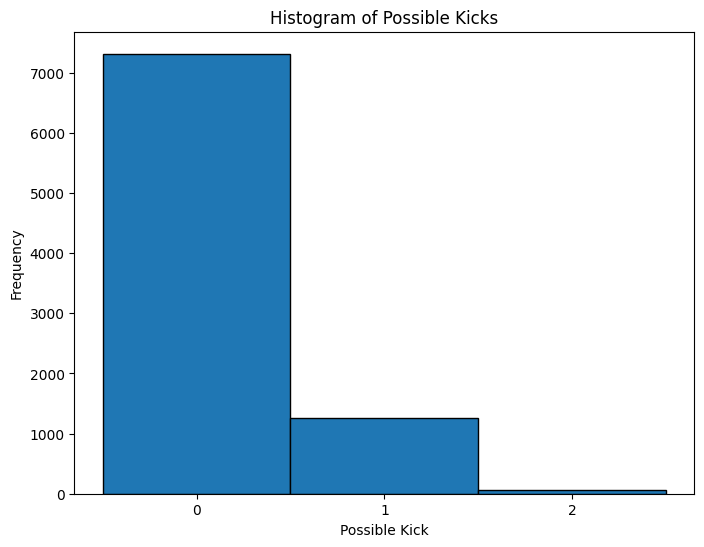

In [ ]:
import matplotlib.pyplot as plt

# Plotting the histogram of possible kicks
plt.figure(figsize=(8, 6))
plt.hist(drilling_df['possible_kick'], bins=[0, 1, 2, 3], edgecolor='black', align='left')

# Adding labels and title
plt.xlabel('Possible Kick')
plt.ylabel('Frequency')
plt.title('Histogram of Possible Kicks')
plt.xticks([0, 1, 2])  # Set the x-axis ticks to match the possible kick values

# Display the plot
plt.show()


In [ ]:
drilling_df.fillna(method='bfill', inplace=True)
drilling_df

<ipython-input-21-57c08fa6f8c7>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  drilling_df.fillna(method='bfill', inplace=True)


,TIME,WOB (SURFACE),BIT DEPTH (SURFACE),DEPTH (SURFACE),ROP (SURFACE),BLOCK POSITION (SURFACE),RPM (SURFACE),HOOKLOAD (SURFACE),TORQUE (SURFACE),SPP (SURFACE),...,FLOW IN (SURFACE),TVA (SURFACE),flow_rate_change_in5,TVA_change_in5,ROP_change_in5,SPP_change_in5,WOB_change_in5,Flow_in_change_in5,score,possible_kick
0,2023-03-24 03:46:00+03:00,10.157143,8736.235714,8736.235714,0.238095,59.171429,40.001000,250.204762,2.990143,1440.980952,...,449.666667,366.123810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,2023-03-24 03:47:00+03:00,9.543333,8736.339167,8736.339167,9.390000,59.043333,40.001000,250.836667,3.163517,1438.778333,...,449.666667,365.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,2023-03-24 03:48:00+03:00,13.910000,8736.571500,8736.571500,14.125000,58.818333,39.767667,246.400000,4.165967,1426.840000,...,449.683333,365.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,2023-03-24 03:49:00+03:00,15.326667,8736.649500,8736.649500,4.208333,58.750000,39.834333,245.045000,3.945833,1421.620000,...,449.733333,366.661667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,2023-03-24 03:50:00+03:00,17.095000,8736.829000,8736.829000,9.958333,58.523333,39.667667,243.281667,4.325683,1414.788333,...,449.683333,367.058333,-0.245238,0.934524,9.720238,-26.192619,6.937857,0.016667,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8630,2023-10-12 05:41:00+03:00,1.776667,9772.161333,9772.161333,29.615000,47.305000,38.317667,202.886667,2.256900,2089.008333,...,220.966667,158.235000,-0.216667,3.681667,6.261667,1008.455000,-3.218333,-29.066667,20,0
8631,2023-10-12 05:42:00+03:00,0.581667,9772.480833,9772.480833,16.603333,46.986667,38.451000,204.165000,2.093467,2088.306667,...,221.066667,158.196667,0.233333,3.663333,-2.865000,1005.865000,-5.398333,-28.933333,20,0
8632,2023-10-12 05:43:00+03:00,0.000000,9772.851500,9772.851500,22.546667,46.625000,38.367667,205.506667,1.953100,2098.301667,...,220.950000,158.165000,-0.016667,3.401667,22.286667,1015.201667,-7.966667,-29.050000,20,0
8633,2023-10-12 05:44:00+03:00,0.000000,9773.244667,9773.244667,23.805000,46.231667,38.401000,205.900000,1.983400,2083.573333,...,221.000000,158.100000,15.766667,-81.045000,11.718333,407.893333,-118.728333,221.000000,100,2


In [ ]:
# Set the TIME column as index
drilling_df.set_index('TIME', inplace=True)

In [ ]:
drilling_df

,WOB (SURFACE),BIT DEPTH (SURFACE),DEPTH (SURFACE),ROP (SURFACE),BLOCK POSITION (SURFACE),RPM (SURFACE),HOOKLOAD (SURFACE),TORQUE (SURFACE),SPP (SURFACE),FLOW OUT (SURFACE),FLOW IN (SURFACE),TVA (SURFACE),flow_rate_change_in5,TVA_change_in5,ROP_change_in5,SPP_change_in5,WOB_change_in5,Flow_in_change_in5,score,possible_kick
TIME,,,,,,,,,,,,,,,,,,,,
2023-03-24 03:46:00+03:00,10.157143,8736.235714,8736.235714,0.238095,59.171429,40.001000,250.204762,2.990143,1440.980952,17.095238,449.666667,366.123810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2023-03-24 03:47:00+03:00,9.543333,8736.339167,8736.339167,9.390000,59.043333,40.001000,250.836667,3.163517,1438.778333,16.316667,449.666667,365.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2023-03-24 03:48:00+03:00,13.910000,8736.571500,8736.571500,14.125000,58.818333,39.767667,246.400000,4.165967,1426.840000,16.366667,449.683333,365.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2023-03-24 03:49:00+03:00,15.326667,8736.649500,8736.649500,4.208333,58.750000,39.834333,245.045000,3.945833,1421.620000,16.116667,449.733333,366.661667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2023-03-24 03:50:00+03:00,17.095000,8736.829000,8736.829000,9.958333,58.523333,39.667667,243.281667,4.325683,1414.788333,16.850000,449.683333,367.058333,-0.245238,0.934524,9.720238,-26.192619,6.937857,0.016667,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-12 05:41:00+03:00,1.776667,9772.161333,9772.161333,29.615000,47.305000,38.317667,202.886667,2.256900,2089.008333,15.783333,220.966667,158.235000,-0.216667,3.681667,6.261667,1008.455000,-3.218333,-29.066667,20,0
2023-10-12 05:42:00+03:00,0.581667,9772.480833,9772.480833,16.603333,46.986667,38.451000,204.165000,2.093467,2088.306667,15.933333,221.066667,158.196667,0.233333,3.663333,-2.865000,1005.865000,-5.398333,-28.933333,20,0
2023-10-12 05:43:00+03:00,0.000000,9772.851500,9772.851500,22.546667,46.625000,38.367667,205.506667,1.953100,2098.301667,15.683333,220.950000,158.165000,-0.016667,3.401667,22.286667,1015.201667,-7.966667,-29.050000,20,0


In [ ]:
# Drop non-numerical and unnecessary columns
data = drilling_df.drop(columns=[' BLOCK POSITION (SURFACE)',' FLOW IN (SURFACE)',' DEPTH (SURFACE)',' RPM (SURFACE)','flow_rate_change_in5', 'TVA_change_in5', 'ROP_change_in5', 'SPP_change_in5', 'WOB_change_in5',
               'Flow_in_change_in5', 'score',])
data

,WOB (SURFACE),BIT DEPTH (SURFACE),ROP (SURFACE),HOOKLOAD (SURFACE),TORQUE (SURFACE),SPP (SURFACE),FLOW OUT (SURFACE),TVA (SURFACE),possible_kick
TIME,,,,,,,,,
2023-03-24 03:46:00+03:00,10.157143,8736.235714,0.238095,250.204762,2.990143,1440.980952,17.095238,366.123810,0
2023-03-24 03:47:00+03:00,9.543333,8736.339167,9.390000,250.836667,3.163517,1438.778333,16.316667,365.800000,0
2023-03-24 03:48:00+03:00,13.910000,8736.571500,14.125000,246.400000,4.165967,1426.840000,16.366667,365.740000,0
2023-03-24 03:49:00+03:00,15.326667,8736.649500,4.208333,245.045000,3.945833,1421.620000,16.116667,366.661667,0
2023-03-24 03:50:00+03:00,17.095000,8736.829000,9.958333,243.281667,4.325683,1414.788333,16.850000,367.058333,0
...,...,...,...,...,...,...,...,...,...
2023-10-12 05:41:00+03:00,1.776667,9772.161333,29.615000,202.886667,2.256900,2089.008333,15.783333,158.235000,0
2023-10-12 05:42:00+03:00,0.581667,9772.480833,16.603333,204.165000,2.093467,2088.306667,15.933333,158.196667,0
2023-10-12 05:43:00+03:00,0.000000,9772.851500,22.546667,205.506667,1.953100,2098.301667,15.683333,158.165000,0


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Convert the data into sequences
timesteps = 5  # Set the sequence length
def create_sequences(data, timesteps):
    sequences = []
    for i in range(len(data) - timesteps + 1):
        seq = data[i:i+timesteps]
        sequences.append(seq)
    return np.array(sequences)

X = create_sequences(data_scaled, timesteps)


# Split the data into training and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
# Extract the labels
y_test = X_test[:, -1]
# Remove the label column from X_test to use it for prediction
X_test2 = X_test[:, :-1]

In [ ]:
X_train.shape

(6904, 5, 9)

In [ ]:
# LSTM Autoencoder model
n_features = X.shape[2]
n_features

9

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization

# define Autoencoder model
#Input shape would be seq_size, 1 - 1 beacuse we have 1 feature.
# seq_size = trainX.shape[1]

model = Sequential([
    LSTM(256, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(128, activation='relu', return_sequences=False),
    Dropout(0.2),
    RepeatVector(X_train.shape[1]),
    Dropout(0.2),
    LSTM(128, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(256, activation='relu', return_sequences=True),
    TimeDistributed(Dense(X_train.shape[2]))
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.00001), loss='mse')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 256)              │         272,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 5, 128)              │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 5, 256)              │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 5, 9)                │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 997,641 (3.81 MB)

 Trainable params: 997,641 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train with EarlyStopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, X_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 0.3309 - val_loss: 0.2870
Epoch 2/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.1965 - val_loss: 0.1186
Epoch 3/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1121 - val_loss: 0.0677
Epoch 4/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0559 - val_loss: 0.0157
Epoch 5/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0271 - val_loss: 0.0127
Epoch 6/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0231 - val_loss: 0.0122
Epoch 7/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0213 - val_loss: 0.0122
Epoch 8/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0204 - val_loss: 0.0116
Epoch 9/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188 - val_loss: 0.0110
Epoch 10/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0178 - val_loss: 0.0117
Epoch 11/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0168 - val_loss: 0.0112
Epoch 12/50
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/st

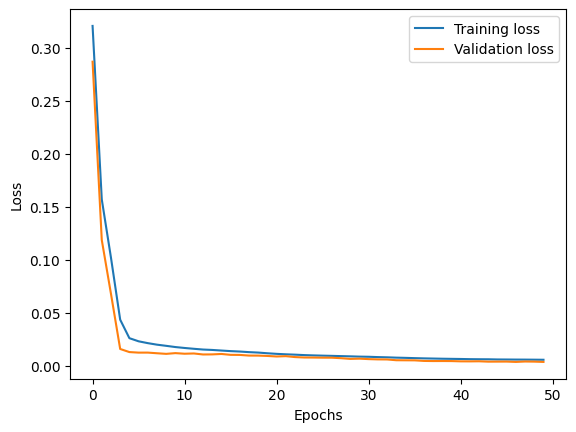

In [ ]:
from matplotlib import pyplot as plt

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')

# Adding labels to the axes
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


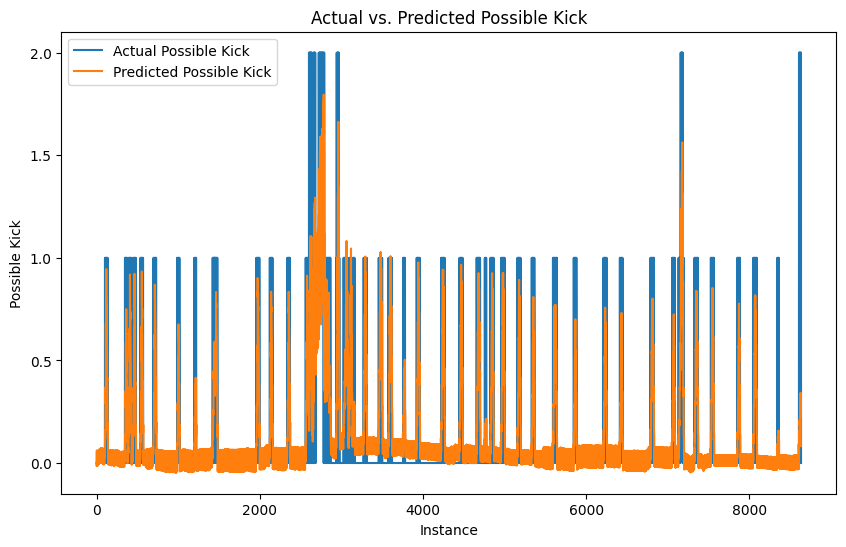

In [ ]:
# Use the trained model to predict possible_kick values on the test set
X_test_pred = model.predict(X_test)

# The predicted sequences will be in the same scale as the original data, so we need to inverse transform them
X_test_pred_rescaled = scaler.inverse_transform(X_test_pred.reshape(-1, n_features))
X_test_rescaled = scaler.inverse_transform(X_test.reshape(-1, n_features))

# Extract the 'possible_kick' column from the rescaled data (assuming it's the last column)
possible_kick_test_pred = X_test_pred_rescaled[:, -1]
possible_kick_test_actual = X_test_rescaled[:, -1]
plt.figure(figsize=(10, 6))
plt.plot(possible_kick_test_actual, label='Actual Possible Kick')
plt.plot(possible_kick_test_pred, label='Predicted Possible Kick')
plt.xlabel('Instance')
plt.ylabel('Possible Kick')
plt.title('Actual vs. Predicted Possible Kick')
plt.legend()
plt.show()

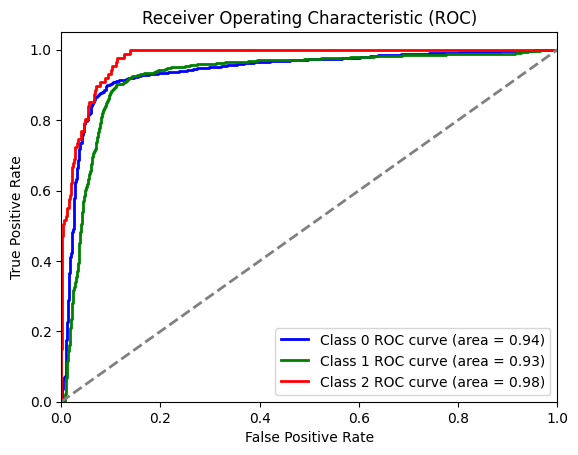

AUC for class 0: 0.94
AUC for class 1: 0.93
AUC for class 2: 0.98


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Binarize the labels for a one-vs-rest ROC curve calculation
y_test_binarized = label_binarize(possible_kick_test_actual, classes=[0, 1, 2])

# Number of classes
n_classes = y_test_binarized.shape[1]


#Calculate the residuals (errors) between actual and predicted 'possible_kick'
residuals = np.abs(possible_kick_test_actual - possible_kick_test_pred)

# Initialize a dictionary to store ROC curve data for each class
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], residuals)
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], residuals)
    if (i == 0):
      fpr[i] = 1 - fpr[i]
      tpr[i] = 1 - tpr[i]
      roc_auc[i] = 1-roc_auc[i]

# 7. Plot ROC curve for each class
plt.figure()
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print AUC for each class
for i in range(n_classes):
    print(f"AUC for class {i}: {roc_auc[i]:.2f}")


In [ ]:
# Check the types and unique values
print("Unique values in actual labels:", np.unique(possible_kick_test_actual))
print("Unique values in predicted labels:", np.unique(possible_kick_test_pred))
print("Type of actual labels:", type(possible_kick_test_actual))
print("Type of predicted labels:", type(possible_kick_test_pred))
print("Shape of actual labels:", possible_kick_test_actual.shape)
print("Shape of predicted labels:", possible_kick_test_pred.shape)

Unique values in actual labels: [0. 1. 2.]
Unique values in predicted labels: [-0.04735181 -0.04696736 -0.04525911 ...  1.7527406   1.7587907
  1.7958765 ]
Type of actual labels: <class 'numpy.ndarray'>
Type of predicted labels: <class 'numpy.ndarray'>
Shape of actual labels: (8635,)
Shape of predicted labels: (8635,)


In [ ]:
from sklearn.metrics import accuracy_score

# Step 1: Round the continuous predictions to the nearest integer
predicted_class_labels = np.round(possible_kick_test_pred).astype(int)

# Ensure the values are within the valid class range (0, 1, 2)
predicted_class_labels = np.clip(predicted_class_labels, 0, 2)

# Step 2: Calculate overall accuracy
overall_accuracy = accuracy_score(possible_kick_test_actual, predicted_class_labels)
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Step 3: Calculate accuracy for each class
class_accuracies = {}
for i in range(n_classes):
    mask = (possible_kick_test_actual == i)
    class_accuracies[i] = accuracy_score(possible_kick_test_actual[mask], predicted_class_labels[mask])
    print(f"Accuracy for Class {i}: {class_accuracies[i]:.2f}")


Overall Accuracy: 0.92
Accuracy for Class 0: 0.97
Accuracy for Class 1: 0.59
Accuracy for Class 2: 0.10


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Assuming predicted_class_labels has been rounded and clipped as in the previous step

# Calculate precision and recall for each class
for i in range(n_classes):
    precision = precision_score(possible_kick_test_actual, predicted_class_labels, labels=[i], average='micro')
    recall = recall_score(possible_kick_test_actual, predicted_class_labels, labels=[i], average='micro')
    print(f"Precision for Class {i}: {precision:.2f}")
    print(f"Recall for Class {i}: {recall:.2f}")

# Optionally, calculate macro-averaged precision and recall across all classes
macro_precision = precision_score(possible_kick_test_actual, predicted_class_labels, average='macro')
macro_recall = recall_score(possible_kick_test_actual, predicted_class_labels, average='macro')
print(f"Macro-averaged Precision: {macro_precision:.2f}")
print(f"Macro-averaged Recall: {macro_recall:.2f}")

Precision for Class 0: 0.94
Recall for Class 0: 0.97
Precision for Class 1: 0.71
Recall for Class 1: 0.59
Precision for Class 2: 0.43
Recall for Class 2: 0.10
Macro-averaged Precision: 0.70
Macro-averaged Recall: 0.56


In [ ]:
# Save the trained model
model.save('lstm_ae.keras')

# Reconstruction of Paper